In [19]:
print('Hello, world!')

Hello, world!


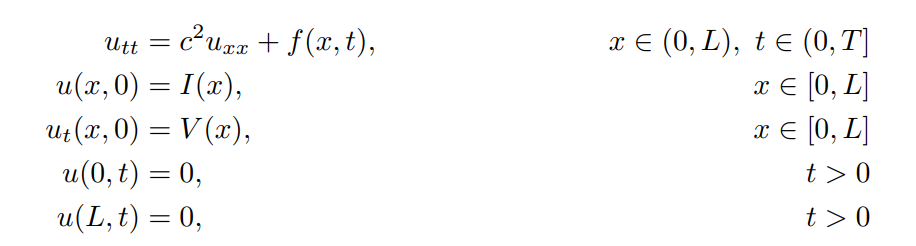

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [21]:
x = np.linspace(0., 50., 5_000)
t = np.linspace(0., 5., 5_000)

dx = x[1] - x[0]
dt = t[1] - t[0]

c0 = 9.0
C = c0*dt/dx
print(C)

0.9


In [22]:
print(C)

0.9


In [23]:
u = np.zeros_like(x)
print('u shape ', u.shape)
print('x shape ', x.shape)
print('t shape ', t.shape)

u shape  (5000,)
x shape  (5000,)
t shape  (5000,)


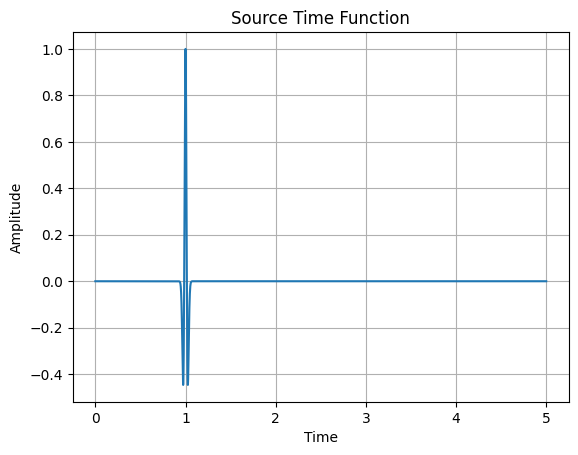

In [24]:
def mexican_hat(x, x0, sigma, amp):
    r = (x - x0) / sigma
    return amp * (1 - r**2) * np.exp(-0.5 * r**2)


src_p = 2_500
f = np.zeros_like(t)
f[50:2000] = mexican_hat(t[50:2000], 1, 0.015, 1.0)

plt.plot(t, f)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Source Time Function')
plt.grid()
plt.show()

In [25]:
all_u_s = []
u_prev = np.zeros_like(x)
u_curr = np.zeros_like(x)
for i in tqdm(range(2, len(t))):
    u_next = np.zeros_like(u)
    for j in range(1, len(x) - 1):
        if j == 0 or j == len(x) - 1:
            u_next[j] = 0.0
        else:
            u_next[j] = - u_prev[j] + 2*u_curr[j] + (C**2)*(u_curr[j+1] - 2*u_curr[j] + u_curr[j - 1])
    u_next[src_p] += f[i]
    u_prev = u_curr
    u_curr = u_next
    all_u_s.append(u_curr.copy())

100%|██████████| 4998/4998 [00:20<00:00, 246.81it/s]


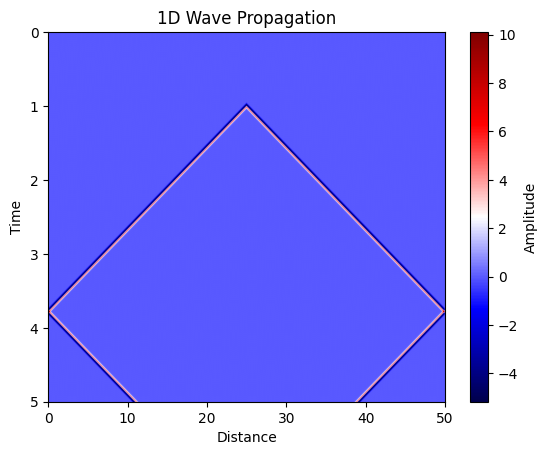

In [26]:
all_u = np.array(all_u_s)
plt.imshow(all_u, aspect='auto', extent=[x[0], x[-1], t[-1], t[0]], cmap='seismic')
plt.colorbar(label='Amplitude')
plt.xlabel('Distance')
plt.ylabel('Time')
plt.title('1D Wave Propagation')
plt.show()

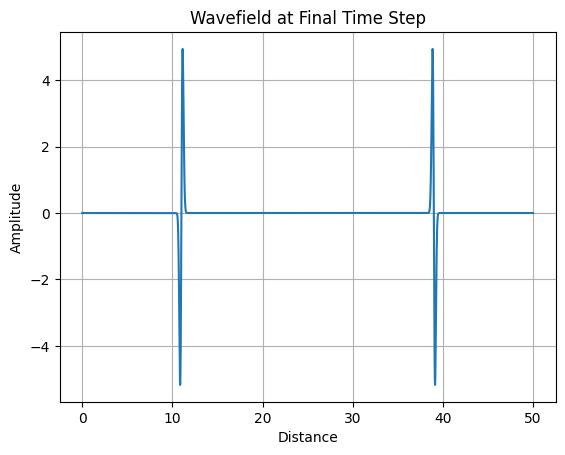

In [27]:
plt.plot(x, u_curr)
plt.xlabel('Distance') 
plt.ylabel('Amplitude')
plt.title('Wavefield at Final Time Step')
plt.grid()
plt.show()

In [28]:
## boundary like u = 0 changes the sign when reflecting